## Clustering(Hierarchical, Kmeans & DBSCAN)

### Data Description:
* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### The Crime Data

In [5]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### EDA

In [7]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


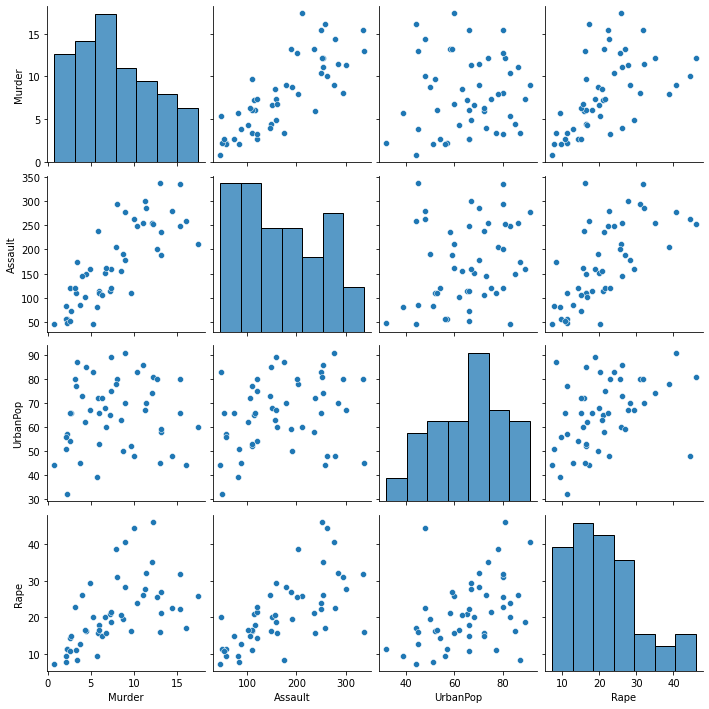

In [12]:
sns.pairplot(crime_data)

<AxesSubplot:>

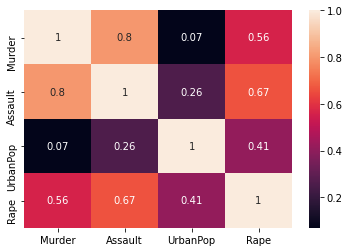

In [36]:
sns.heatmap(crime_data.corr(), annot=True)

<AxesSubplot:xlabel='Rape', ylabel='Unnamed: 0'>

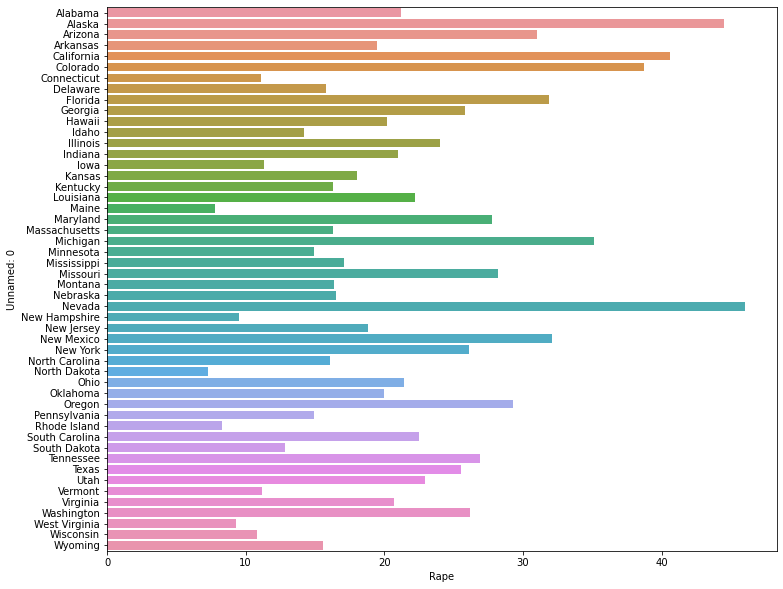

In [27]:
plt.figure(figsize=(12,10))
sns.barplot(x=crime_data['Rape'], y=crime_data['Unnamed: 0'])

In [39]:
# Feature Scaling 

scaler = StandardScaler()
x = scaler.fit_transform(crime_data.iloc[:,1:])

## Hierarchical Clusternig

<Figure size 864x864 with 0 Axes>

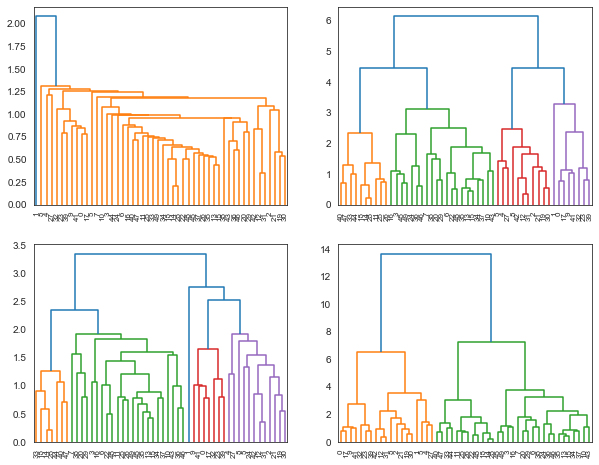

In [97]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
den = sch.dendrogram(sch.linkage(x, method='single'))

plt.subplot(2,2,2)
den = sch.dendrogram(sch.linkage(x, method='complete'))

plt.subplot(2,2,3)
den = sch.dendrogram(sch.linkage(x, method='average'))

plt.subplot(2,2,4)
den = sch.dendrogram(sch.linkage(x, method='ward'))

In [108]:
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [110]:
crime_data['Hirarchical'] = hc.labels_

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

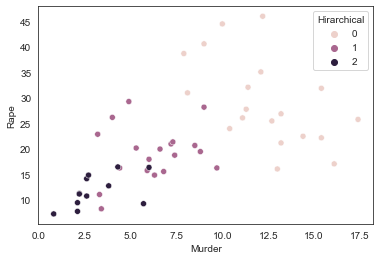

In [111]:
sns.scatterplot(x='Murder',y='Rape',hue='Hirarchical',data=crime_data)

In [112]:
crime_data.groupby('Hirarchical').agg('mean')

,Murder,Assault,UrbanPop,Rape
Hirarchical,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


## KMeans Clusternig

In [113]:
kmeans = KMeans()

In [118]:
#wcss to selact optimum number of cluster

wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\shiva\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


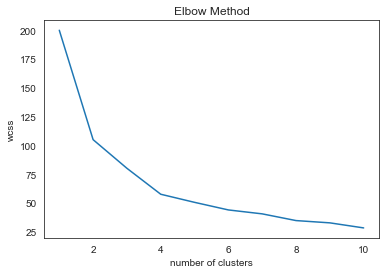

In [119]:
#visulization
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [191]:
# 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [192]:
crime_data['Kmeans'] = kmeans.labels_

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

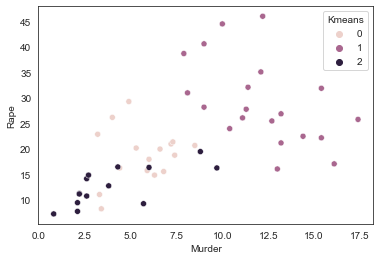

In [193]:
sns.scatterplot(x='Murder',y='Rape',hue='Kmeans',data=crime_data)

In [227]:
crime_data.groupby('Kmeans').agg('mean')

,Murder,Assault,UrbanPop,Rape,Hirarchical,dbscan
Kmeans,,,,,,
0,5.656250,138.875,73.875000,18.78125,1.000000,1.8125
1,12.165000,255.250,68.400000,29.16500,0.050000,0.2000
2,3.971429,86.500,51.928571,12.70000,1.857143,2.0000


In [230]:
# 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [231]:
crime_data['Kmeans'] = kmeans.labels_
crime_data.groupby('Kmeans').agg('mean')

,Murder,Assault,UrbanPop,Rape,Hirarchical,dbscan
Kmeans,,,,,,
0,3.600000,78.538462,52.076923,12.176923,1.923077,2.000000
1,10.815385,257.384615,76.000000,33.192308,0.076923,0.307692
2,5.656250,138.875000,73.875000,18.781250,1.000000,1.812500
3,13.937500,243.625000,53.750000,21.412500,0.125000,0.250000


## DBSCAN

In [185]:
#create the model
dbscan=DBSCAN(eps=1.1,min_samples=3)
dbscan.fit(x)

DBSCAN(eps=1.1, min_samples=3)

In [186]:
crime_data['dbscan'] = dbscan.labels_

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

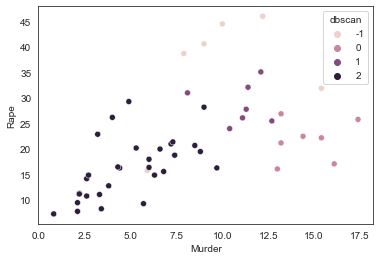

In [187]:
sns.scatterplot(x='Murder',y='Rape',hue='dbscan',data=crime_data)

In [188]:
crime_data.groupby('dbscan').agg('mean')

,Murder,Assault,UrbanPop,Rape,Hirarchical,Kmeans
dbscan,,,,,,
-1,10.066667,261.333333,75.000000,36.250000,0.166667,0.833333
0,14.671429,251.285714,54.285714,21.685714,0.000000,1.000000
1,11.014286,262.571429,77.142857,28.800000,0.000000,1.000000
2,4.973333,112.433333,63.566667,16.356667,1.400000,0.033333


## Inferences

we reduce eps value the number of outlier will increases and we increase the minimum samples beyond 5 no of outliers will increases. so optimum value of eps is 1.1 and minimum samples is 3. we get result from this data we could not get best combination, because in one cluster we have 30 data points which is 60% of total dataset. but noice data points are in limit that is about 14% of total dataset

we should not use DBSCAN for this data set.

## Insights


for this data we have maximum 2 cluster and in murder have  min = 0.8 and max is 9.7, in assault have min= 45 and max = 190 ,in urbanpop have min=32 and man=89 , in rape have min=7.3 and max=29.3

#### Hirachical vs Kmeans vs DBscan

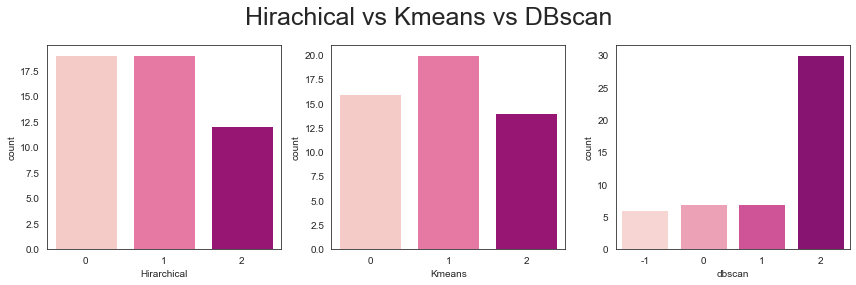

In [213]:
f, axs = plt.subplots(1,3, figsize=(12,4))
f.suptitle("Hirachical vs Kmeans vs DBscan",size=30)

sns.countplot(x=crime_data['Hirarchical'], ax=axs[0], palette='RdPu')
sns.countplot(x=crime_data['Kmeans'], ax=axs[1], palette='RdPu')
sns.countplot(x=crime_data['dbscan'], ax=axs[2], palette='RdPu')

f.tight_layout()